In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("notebook")
sns.set_palette(sns.color_palette("magma_r"))

## 1. Аналіз та підготовка даних

Uploading the extended iris dataset from kaggle, which is like the Iris dataset but has more columns and more items (1200 irises in total): https://www.kaggle.com/datasets/samybaladram/iris-dataset-extended

In [26]:
extended_iris = pd.read_csv('iris_extended.csv')
extended_iris.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


Looking at the total number of columns and dropping some columns I won't be working with

In [27]:
extended_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species                          1200 non-null   object 
 1   elevation                        1200 non-null   float64
 2   soil_type                        1200 non-null   object 
 3   sepal_length                     1200 non-null   float64
 4   sepal_width                      1200 non-null   float64
 5   petal_length                     1200 non-null   float64
 6   petal_width                      1200 non-null   float64
 7   sepal_area                       1200 non-null   float64
 8   petal_area                       1200 non-null   float64
 9   sepal_aspect_ratio               1200 non-null   float64
 10  petal_aspect_ratio               1200 non-null   float64
 11  sepal_to_petal_length_ratio      1200 non-null   float64
 12  sepal_to_petal_width

In [28]:
extended_iris_1 = extended_iris.drop(columns=['sepal_area', 'petal_area', 'sepal_aspect_ratio', 'petal_aspect_ratio', 
                                              'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio', 
                                             'sepal_petal_length_diff', 'sepal_petal_width_diff', 
                                             'petal_texture_trichomes_per_mm2', 'sepal_area_sqrt', 
                                              'petal_area_sqrt', 'area_ratios'])
extended_iris_1.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,petal_curvature_mm,leaf_area_cm2
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,5.33,53.21
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,5.90,52.53
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,5.66,50.25
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,4.51,50.85
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,4.03,40.57


Describing the dataset, separately for numeric and categorical values

The only two categorical values are the iris species and the soil type

In [29]:
extended_iris_1.describe()

,elevation,sepal_length,sepal_width,petal_length,petal_width,petal_curvature_mm,leaf_area_cm2
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,173.543917,5.895900,3.052858,3.807950,1.189542,8.355267,60.144650
std,72.461258,0.845579,0.527120,1.765469,0.728882,3.172975,10.224305
min,50.100000,4.040000,1.700000,0.960000,0.050000,3.310000,35.160000
25%,110.875000,5.210000,2.690000,1.640000,0.360000,5.310000,52.302500
50%,171.300000,5.840000,3.030000,4.300000,1.290000,7.925000,59.170000
75%,239.125000,6.520000,3.390000,5.200000,1.740000,10.715000,67.305000
max,299.900000,9.120000,4.760000,7.840000,2.990000,17.890000,86.930000


In [30]:
extended_iris_1.describe(include='object')

,species,soil_type
count,1200,1200
unique,3,3
top,setosa,clay
freq,400,444


Looking at the amount of NaN values in the dataset. This one had 0

In [31]:
extended_iris_1.isna().sum()

species               0
elevation             0
soil_type             0
sepal_length          0
sepal_width           0
petal_length          0
petal_width           0
petal_curvature_mm    0
leaf_area_cm2         0
dtype: int64

Doing label encoder on the species and soil type

In [19]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le.fit(extended_iris_1['species'])
species_code = le.transform(extended_iris_1['species'])
species_code

array([0, 0, 0, ..., 2, 2, 2], shape=(1200,))

In [33]:
extended_iris_1.insert(loc = 1,
          column = 'species_code',
          value = species_code)
extended_iris_1.head()

,species,species_code,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,petal_curvature_mm,leaf_area_cm2
0,setosa,0,161.8,sandy,5.16,3.41,1.64,0.26,5.33,53.21
1,setosa,0,291.4,clay,5.48,4.05,1.53,0.37,5.90,52.53
2,setosa,0,144.3,sandy,5.10,2.80,1.47,0.38,5.66,50.25
3,setosa,0,114.6,clay,4.64,3.44,1.53,0.17,4.51,50.85
4,setosa,0,110.9,loamy,4.85,2.87,1.23,0.26,4.03,40.57


In [34]:
le.fit(extended_iris_1['soil_type'])
soil_code = le.transform(extended_iris_1['soil_type'])
soil_code

array([2, 0, 2, ..., 0, 2, 1], shape=(1200,))

In [ ]:
# 'sandy', 'clay', 'loamy' 0 = clay, 1 = loamy, 2 = sandy

In [35]:
extended_iris_1.insert(loc = 3,
          column = 'soil_code',
          value = soil_code)

In [36]:
extended_iris_1.head()

,species,species_code,elevation,soil_code,soil_type,sepal_length,sepal_width,petal_length,petal_width,petal_curvature_mm,leaf_area_cm2
0,setosa,0,161.8,2,sandy,5.16,3.41,1.64,0.26,5.33,53.21
1,setosa,0,291.4,0,clay,5.48,4.05,1.53,0.37,5.90,52.53
2,setosa,0,144.3,2,sandy,5.10,2.80,1.47,0.38,5.66,50.25
3,setosa,0,114.6,0,clay,4.64,3.44,1.53,0.17,4.51,50.85
4,setosa,0,110.9,1,loamy,4.85,2.87,1.23,0.26,4.03,40.57


Dropping the original soil type columns, since now we have the categorical columns added to the dataset as well

In [37]:
extended_iris_2 = extended_iris_1.drop(columns=['soil_type'])
extended_iris_2.head()

,species,species_code,elevation,soil_code,sepal_length,sepal_width,petal_length,petal_width,petal_curvature_mm,leaf_area_cm2
0,setosa,0,161.8,2,5.16,3.41,1.64,0.26,5.33,53.21
1,setosa,0,291.4,0,5.48,4.05,1.53,0.37,5.90,52.53
2,setosa,0,144.3,2,5.10,2.80,1.47,0.38,5.66,50.25
3,setosa,0,114.6,0,4.64,3.44,1.53,0.17,4.51,50.85
4,setosa,0,110.9,1,4.85,2.87,1.23,0.26,4.03,40.57


Exporting extended_iris_2 into a csv file so I could use it later

In [38]:
extended_iris_2.to_csv('edited_extended_iris_df.csv', index=False)

Building a correlation matrix

In [39]:
correlation = extended_iris_2.iloc[:, 1:].corr()
correlation

,species_code,elevation,soil_code,sepal_length,sepal_width,petal_length,petal_width,petal_curvature_mm,leaf_area_cm2
species_code,1.000000,0.000197,0.036476,0.739455,-0.340355,0.940339,0.928476,0.907670,0.790580
elevation,0.000197,1.000000,-0.037079,-0.202144,0.024748,-0.078673,0.001788,-0.014559,-0.005169
soil_code,0.036476,-0.037079,1.000000,0.042912,-0.579104,0.036008,-0.130446,0.048658,0.033880
sepal_length,0.739455,-0.202144,0.042912,1.000000,-0.288627,0.739432,0.690841,0.645211,0.602984
sepal_width,-0.340355,0.024748,-0.579104,-0.288627,1.000000,-0.393797,-0.261047,-0.278785,-0.248407
petal_length,0.940339,-0.078673,0.036008,0.739432,-0.393797,1.000000,0.901696,0.869443,0.757605
petal_width,0.928476,0.001788,-0.130446,0.690841,-0.261047,0.901696,1.000000,0.863894,0.749208
petal_curvature_mm,0.907670,-0.014559,0.048658,0.645211,-0.278785,0.869443,0.863894,1.000000,0.709533
leaf_area_cm2,0.790580,-0.005169,0.033880,0.602984,-0.248407,0.757605,0.749208,0.709533,1.000000


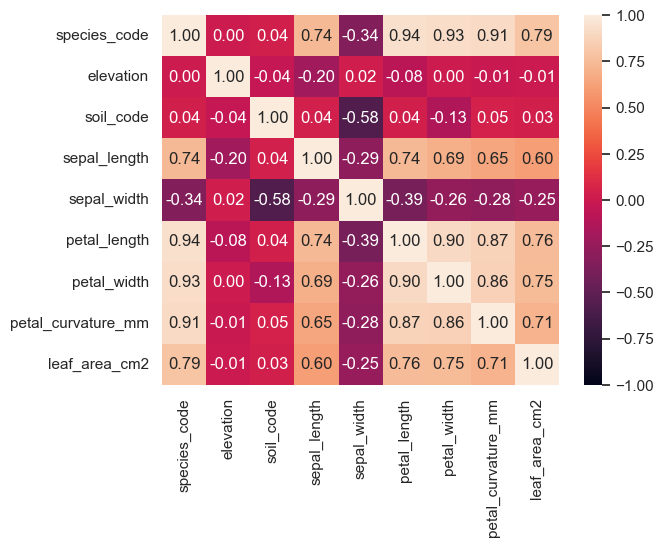

In [41]:
sns.heatmap(correlation, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

Species correlate the most with petal_length (0.94), petal_width (0.93) and petal_curvature (0.91)

Species do not correlate at all with the soil type (0.04) and the elevation (0.00)

## **2. Розробка моделі машинного навчання**

Creating the X and the y parts of the dataset

In [42]:
extended_iris_3 = extended_iris_2.drop(columns=['species_code'])
extended_iris_3.head()

,species,elevation,soil_code,sepal_length,sepal_width,petal_length,petal_width,petal_curvature_mm,leaf_area_cm2
0,setosa,161.8,2,5.16,3.41,1.64,0.26,5.33,53.21
1,setosa,291.4,0,5.48,4.05,1.53,0.37,5.90,52.53
2,setosa,144.3,2,5.10,2.80,1.47,0.38,5.66,50.25
3,setosa,114.6,0,4.64,3.44,1.53,0.17,4.51,50.85
4,setosa,110.9,1,4.85,2.87,1.23,0.26,4.03,40.57


In [65]:
X = extended_iris_3.drop('species', axis='columns')
X.head()

,elevation,soil_code,sepal_length,sepal_width,petal_length,petal_width,petal_curvature_mm,leaf_area_cm2
0,161.8,2,5.16,3.41,1.64,0.26,5.33,53.21
1,291.4,0,5.48,4.05,1.53,0.37,5.90,52.53
2,144.3,2,5.10,2.80,1.47,0.38,5.66,50.25
3,114.6,0,4.64,3.44,1.53,0.17,4.51,50.85
4,110.9,1,4.85,2.87,1.23,0.26,4.03,40.57


In [44]:
y = extended_iris_3.species
y

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
          ...    
1195    virginica
1196    virginica
1197    virginica
1198    virginica
1199    virginica
Name: species, Length: 1200, dtype: object

Doing train test split, and then displaying the training and testing datasets

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

In [75]:
X_train.head()

,elevation,soil_code,sepal_length,sepal_width,petal_length,petal_width,petal_curvature_mm,leaf_area_cm2
653,136.1,0,6.69,3.39,4.38,1.40,6.75,70.26
666,219.8,2,6.25,2.07,4.27,0.81,6.88,53.16
852,156.8,1,6.03,2.84,5.02,2.49,10.78,72.17
873,51.8,0,7.30,3.96,5.84,1.90,9.65,64.66
114,223.0,0,4.78,3.31,1.46,0.28,4.64,62.36


In [76]:
X_test.head()

,elevation,soil_code,sepal_length,sepal_width,petal_length,petal_width,petal_curvature_mm,leaf_area_cm2
164,239.2,0,4.96,3.68,1.53,0.29,5.07,47.73
1137,228.7,1,7.26,3.26,5.86,2.04,14.54,56.10
598,188.8,2,5.91,2.07,3.62,1.05,8.10,71.64
992,205.8,1,6.20,2.58,5.97,2.06,7.58,64.27
324,64.9,2,5.39,3.00,1.71,0.26,4.81,53.82


Running random forest classifier (I couldn't run Pipeline because it's too taxing for my computer)

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier()

In [79]:
rf.fit(X_train.values, y_train.values.ravel())

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [82]:
y_pred = rf.predict(X_test.values)

Looking at the score

In [84]:
rf.score(X_test.values, y_test)

0.9833333333333333

Getting cross validation scores

In [85]:
from sklearn.model_selection import KFold, cross_val_score

In [86]:
cvscore = cross_val_score(rf, X, y.values.ravel(), cv=10)
cvscore

array([0.98333333, 0.95833333, 0.975     , 0.99166667, 0.98333333,
       0.95      , 0.99166667, 0.96666667, 0.98333333, 0.98333333])

In [87]:
average_cvscore = np.mean(cvscore)
average_cvscore

np.float64(0.9766666666666666)

In [88]:
std_cvscore = np.std(cvscore)
std_cvscore

np.float64(0.013333333333333334)

Doing a test prediction

In [92]:
iris_type_1 = rf.predict([[169, 1, 5, 2, 3, 1, 8, 70]])
iris_type_2 = rf.predict([[119, 1, 4.9, 3.8, 1.2, 0.3, 5.18, 50.5]])

In [93]:
iris_type_1, iris_type_2

(array(['versicolor'], dtype=object), array(['setosa'], dtype=object))

Doing hyper parameter tuning using Randomized Search CV

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
parameters = [{
    'n_estimators': [500, 1000, 1500], 
    'max_depth': [10, 20, 30], 
    'min_samples_split': [5, 10, 15], 
    'min_samples_leaf': [1, 2, 4]
}]

In [96]:
random_grid_search = RandomizedSearchCV(rf, parameters, cv = 5, scoring='accuracy', n_jobs = -1, random_state = 19)

In [97]:
random_grid_search.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_distributions,"[{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [5, 10, ...], 'n_estimators': [500, 1000, ...]}]"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,19
,error_score,nan


In [98]:
random_grid_search.best_score_

np.float64(0.978125)

In [99]:
random_grid_search.best_params_

{'n_estimators': 1500,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 20}

Creating a new Random Forest Classifier model, this time using the best parameters the random grid search gave us

In [100]:
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

In [101]:
rf_tuned = RandomForestClassifier(n_estimators=1500, min_samples_split=10, min_samples_leaf=2, max_depth=20)

In [120]:
rf_tuned.fit(X_t_train.values, y_t_train.values.ravel())

,n_estimators,1500
,criterion,'gini'
,max_depth,20
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [121]:
y_t_pred = rf_tuned.predict(X_t_test.values)

In [123]:
rf_tuned.score(X_t_test.values, y_t_test)

0.9708333333333333

Looking at the CV scores of the new RFC model, this time including average and std as well

In [104]:
cvscore_tuned = cross_val_score(rf_tuned, X, y.values, cv=10)
cvscore_tuned

array([0.98333333, 0.95833333, 0.975     , 0.99166667, 0.98333333,
       0.95833333, 0.99166667, 0.98333333, 0.98333333, 0.98333333])

In [105]:
average_cvscore_tuned = np.mean(cvscore_tuned)
average_cvscore_tuned

np.float64(0.9791666666666666)

In [106]:
std_cvscore_tuned = np.std(cvscore_tuned)
std_cvscore_tuned

np.float64(0.01133455875727952)

Making a test prediction with the new RFC model

In [124]:
iris_t_type_1 = rf_tuned.predict([[169, 1, 5, 2, 3, 1, 8, 70]])
iris_t_type_2 = rf_tuned.predict([[119, 1, 4.9, 3.8, 1.2, 0.3, 5.18, 50.5]])

In [125]:
iris_t_type_1, iris_t_type_2

(array(['versicolor'], dtype=object), array(['setosa'], dtype=object))

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [127]:
accuracy = accuracy_score(y_t_test, y_t_pred)
accuracy

0.9708333333333333

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay

In [129]:
c_matrix = confusion_matrix(y_t_test, y_t_pred)
c_matrix

array([[57,  0,  0],
       [ 0, 87,  5],
       [ 0,  2, 89]])

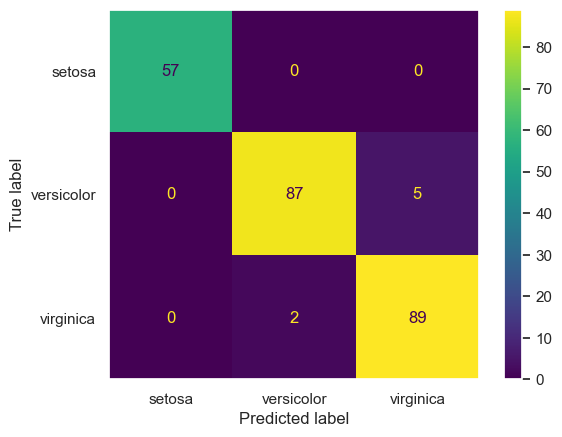

In [130]:
ConfusionMatrixDisplay.from_predictions(y_t_test, y_t_pred)
plt.grid(False)
plt.show()

The confusion matrix shows the following: 
* out of the 57 predictions about Setosa, all were correct
* out of the 92 predictions about Versicolor, 87 were correct and 5 were mistaken for Virginica
* out of the 91 predictions about Virginica, 89 were correct and 2 were mistaken for Versicolor

In [131]:
print(classification_report(y_t_test, y_t_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        57
  versicolor       0.98      0.95      0.96        92
   virginica       0.95      0.98      0.96        91

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240



The f1-score, aka the harmonic mean of precision (how correct) and recall (how incorrect) is 1 for Setosa, 0.96 for Versicolor and 0.96 for Virginica

The average is 0.97

Exporting the model using Joblib, so I could use it later when needed

In [132]:
import joblib

In [133]:
joblib.dump(rf_tuned, 'iris_extended_model.joblib')

['iris_extended_model.joblib']